<center>
<b><font size=6>Industry 4.0 의 중심, BigData</font></b>
</center>

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

### Selenium WebDriver
>  
> - BeautifulSopu 패키지만을 사용하여 크롤링을 할 경우, 모든 웹페이지의 데이터들을 가져오는 것은 아니다.
> - 예를들어, 비동기적으로 뒤늦게 웹페이지의 정보를 업데이트하는 경우와 로그인이나 특정권한을 요구하는 웹페이지의 경우가 그럴것이다.
> - 이때 필요로 하는 패키지가 바로 셀레늄(Selenium)이며, 별도의 webdriver라는 API를 통해 운영체제에 설치된 브라우저를 제어할 수 있다.
> - 즉, 셀레늄을 사용하면 웹페이지상에서 눈에 보이는 모든 데이터를 가져올 수 있다.
> - 참조 : 
<br> - 웹드라이브 : http://www.seleniumhq.org/projects/webdriver/
<br> - 사용법소개 : http://pythonstudy.xyz/python/article/404-%ED%8C%8C%EC%9D%B4%EC%8D%AC-Selenium-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0
<br> - 사용법예제 : http://selenium-python.readthedocs.io/getting-started.html 
<br> - 사용법예제 : https://beomi.github.io/2017/02/27/HowToMakeWebCrawler-With-Selenium/

### Selenium 환경 설정 방법

### <font color='brown'>1. Selenium Package Install</font>
> Selenium을 설치하기 위해서는 먼저 아래와 같이 pip 을 사용하여 Selenium Client 모듈을 설치한다.
> - Anaconda Prompt 에서 pip install selenium 실행

<hr>

### <font color='brown'>2. Webdriver Down & Install</font> </font>
> 아래 사이트에서 OS에 맞는 웹드라이브를 다운받아 압축을 풀어 driver 폴더에 복사
> - Chrome WebDriver &nbsp;&nbsp;: <a href='http://chromedriver.chromium.org/downloads'>[다운로드1]</a>, &nbsp;&nbsp;&nbsp;<a href='https://sites.google.com/a/chromium.org/chromedriver/downloads'>[다운로드2]</a>
> - Firefox WebDriver &nbsp;&nbsp;&nbsp;&nbsp;: <a href='https://github.com/mozilla/geckodriver/releases'>[다운로드]</a>
> - Microsoft WebDriver : <a href='https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/'>[다운로드]</a>
> 

<br/>
cf. 가장 보편적으로 많이 사용하는 크롬 웹드라이브를 다운받아서 설치한다.


<hr>

### <font color='brown'>3. Selenium 사용법</font>
>  
> - Selenium을 사용하기 위해서는 먼저 selenium.webdriver 모듈을 import 한 후, 
> - 사용할 웹드라이브를 호출하여 브라우져를 실행시킨다.
<br> - 크롬을 사용할 경우 webdriver.Chrome()을 호출 
<br> - 파이어폭스를 사용할 경우 webdriver.Firefox() 를 호출
<br> - Edge를 사용할 경우 webdriver.Edge()을 호출
> - 브라우져를 띄운 상태에서 특정 웹사이트로 이동하기 위해서는 browser 객체의 get() 메서드를 사용한다.

## 서울지역 스타벅스 매장정보 크롤링

In [1]:
from selenium import webdriver as wd
from bs4 import BeautifulSoup as bs

from selenium.webdriver.common.by import By

# 명시적 대기를 위해
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from IPython.display import Image

import numpy as np
import pandas as pd
import platform
import time
import sys

### <font color='brown'>WebDriver 로드</font>
> 크롬 웹드라이브 다운 : https://chromedriver.storage.googleapis.com/index.html?path=2.40/
- 셀레니움이 하는 일은 사림이 하는일과 최대한 유사하게 동작하도록 작업
- 차후 -> 옵션 부여하여 (프록시, 에이전트 조작, 이미지를 배제)
- 크롤링을 오래 돌리면 => 임시파일들이 쌓인다!!
- 1주일정도 돌리다보면 느껴진다. Temp에 막 쌓이므로 -> Temp 파일 삭제


In [2]:
# 드라이브 로드
if platform.system() == 'Darwin':    # MacOS
    driver = wd.Chrome(executable_path='./driver/chromedriver')      
elif platform.system() == 'Windows': # Windows
    driver = wd.Chrome(executable_path='./driver/chromedriver.exe')    
else:
    print("It's unknown system. Hangul fonts are not supported!")

C:\Users\student\AppData\Local\Temp\ipykernel_6340\1512030729.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome(executable_path='./driver/chromedriver.exe')


In [6]:
chrome_options = wd.ChromeOptions()
driver = wd.Chrome(executable_path='chromedriver', options=chrome_options)

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


In [5]:
help(wd.Chrome)

Help on class WebDriver in module selenium.webdriver.chrome.webdriver:

class WebDriver(selenium.webdriver.chromium.webdriver.ChromiumDriver)
 |  WebDriver(executable_path='chromedriver', port=0, options: selenium.webdriver.chrome.options.Options = None, service_args=None, desired_capabilities=None, service_log_path=None, chrome_options=None, service: selenium.webdriver.chrome.service.Service = None, keep_alive=None)
 |  
 |  Controls the ChromeDriver and allows you to drive the browser.
 |  You will need to download the ChromeDriver executable from
 |  http://chromedriver.storage.googleapis.com/index.html
 |  
 |  Method resolution order:
 |      WebDriver
 |      selenium.webdriver.chromium.webdriver.ChromiumDriver
 |      selenium.webdriver.remote.webdriver.WebDriver
 |      selenium.webdriver.remote.webdriver.BaseWebDriver
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, executable_path='chromedriver', port=0, options: selenium.webdriver.chrome.options

In [7]:
# 사전에 필요한 정보를 로드 => DB 혹은 Shell, Batch File에서 인자로 받아서 셋팅
main_url = 'http://www.istarbucks.co.kr/store/index.do'
keyword  = '서울'

In [8]:
# 매장 정보
store_list = []

In [9]:
# 사이트 접속 (get) : 셀레니움이 하는 일은 사림이 하는일과 최대한 유사하게 동작하도록 작업
time.sleep(2)
driver.get(main_url)

# driver.find_element_by_css_selector('').click()

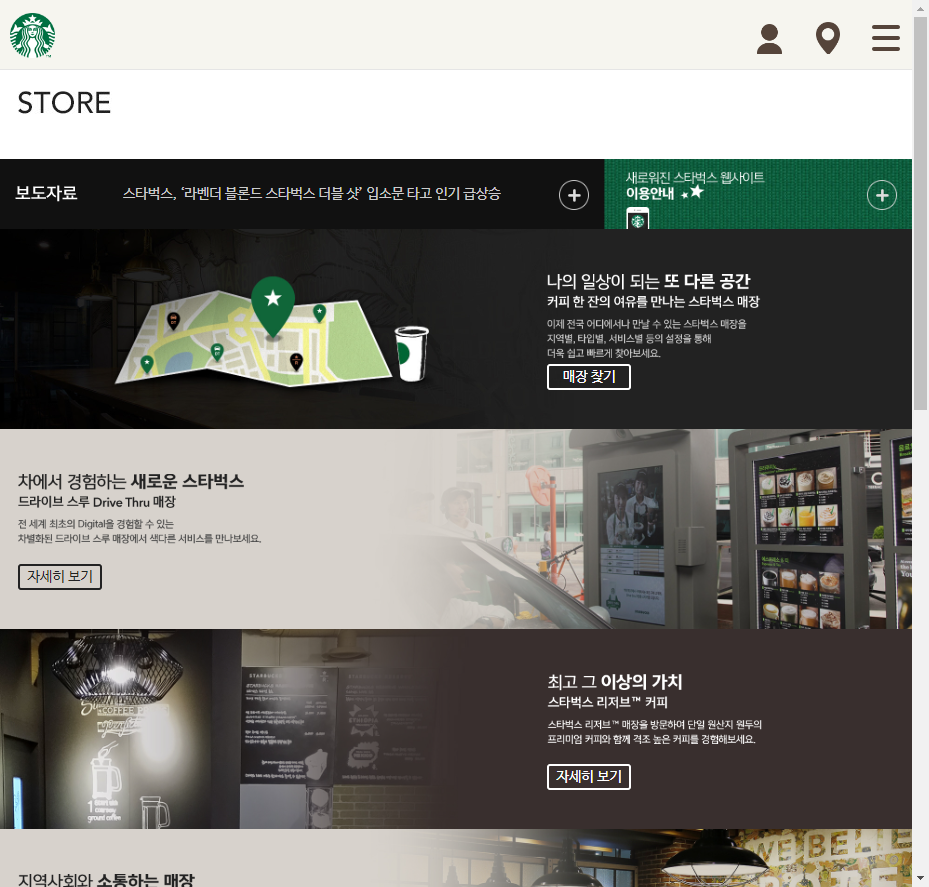

In [10]:
capture_img = './images/istarbucks.png'
driver.save_screenshot(capture_img)
Image(capture_img)

In [11]:
# STORE 메뉴 클릭
driver.find_element_by_css_selector('#gnb > div > nav > div > ul > li.gnb_nav03 > h2 > a').click()

C:\Users\student\AppData\Local\Temp\ipykernel_6340\1784249185.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('#gnb > div > nav > div > ul > li.gnb_nav03 > h2 > a').click()


ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=102.0.5005.63)
Stacktrace:
Backtrace:
	Ordinal0 [0x0123D953+2414931]
	Ordinal0 [0x011CF5E1+1963489]
	Ordinal0 [0x010BC580+836992]
	Ordinal0 [0x010EA4F3+1025267]
	Ordinal0 [0x010E0293+983699]
	Ordinal0 [0x0110449C+1131676]
	Ordinal0 [0x010DFC74+982132]
	Ordinal0 [0x011046B4+1132212]
	Ordinal0 [0x01114812+1198098]
	Ordinal0 [0x011042B6+1131190]
	Ordinal0 [0x010DE860+976992]
	Ordinal0 [0x010DF756+980822]
	GetHandleVerifier [0x014ACC62+2510274]
	GetHandleVerifier [0x0149F760+2455744]
	GetHandleVerifier [0x012CEABA+551962]
	GetHandleVerifier [0x012CD916+547446]
	Ordinal0 [0x011D5F3B+1990459]
	Ordinal0 [0x011DA898+2009240]
	Ordinal0 [0x011DA985+2009477]
	Ordinal0 [0x011E3AD1+2046673]
	BaseThreadInitThunk [0x75B06359+25]
	RtlGetAppContainerNamedObjectPath [0x77DD7C24+228]
	RtlGetAppContainerNamedObjectPath [0x77DD7BF4+180]


In [20]:
# 매장찾기 버튼을 클릭, Copy selector
time.sleep(1)
driver.find_element_by_css_selector('#container > section.store_bn1_section > article > div.store_bn1_btn > a').click()

In [22]:
# 지역검색 탭메뉴 클릭
time.sleep(3)
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a').click()

In [23]:
# 서울 클릭
time.sleep(3)
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a').click()

In [24]:
# 전체 클릭
time.sleep(3)
driver.find_element_by_css_selector('#mCSB_2_container > ul > li:nth-child(1) > a').click()

### <font color='brown'>BeautifulSoup 으로 데이터 크롤링 </font>

In [12]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [25]:
# time.sleep(30)
html = driver.page_source
html[:1000]

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="ko"><head>\n\t\t\n\n\n\n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n<meta property="og:type" content="website" />\n<meta property="og:title" content="Starbucks" />\n<meta property="og:url" content="http://www.istarbucks.co.kr/" />\n<meta property="og:image" content="http://www.istarbucks.co.kr/common/img/kakaotalk.png" />\n<meta property="og:description" content="Starbucks" />\n\n<title id="titleJoin">Starbucks Coffee Korea</title>\n<link rel="shortcut icon" href="/common/img/common/favicon.ico" type="image/ico" />\n<link href="/common/css/reset.css" rel="stylesheet" />\n<link href="/common/css/style.css" rel="stylesheet" />\n<link href="/common/css/jquery.bxslider.css" rel="stylesheet" />\n<link href="/common/css/idangerous.swiper.css" rel="styl

In [26]:
# html = urlopen(url)
# soup = BeautifulSoup(html, "lxml")
soup = bs(html, "lxml")

In [27]:
result = soup.find('div', 'result_num_wrap')
result

<div class="result_num_wrap myStoreInfo">
<!-- 검색결과 없는 경우 -->
<!--strong>검색 결과</strong>(<span class="en t_006633">0</span>개)-->
<!-- 검색결과 있는 경우 -->
<strong class="quickSearchResultCtn"></strong> (검색 결과 <span class="en t_006633 resultCtnNumberTab1">10</span>개)<br/>
<span class="store_pop_info"><img alt="" src="/common/img//store/icon_fav_off.png"/> 클릭하여 나만의 매장을 등록하세요.</span>
</div>

In [28]:
type(result)

bs4.element.Tag

In [29]:
result_list = soup.find_all('div', 'result_list_wrap')
len(result_list)

2

In [30]:
# 서울 전체 스타벅스 배장정보
result_list = soup.find('ul', 'quickSearchResultBoxSidoGugun')
len(result_list)

478

In [39]:
type(result_list)

bs4.element.Tag

In [40]:
result_list.get_text()

' 압구정R   서울특별시 강남구 언주로 861 (신사동)02-541-3622 리저브 매장 2번 수서역R   서울특별시 강남구 광평로 281 (수서동)02-6181-3688 리저브 매장 2번 양재강남빌딩R   서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604 리저브 매장 2번 선릉동신빌딩R   서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562 리저브 매장 2번 봉은사로선정릉   서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564 리저브 매장 2번 강남오거리   서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484 리저브 매장 2번 스타필드코엑스몰R   서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467 리저브 매장 2번 강남구청정문   서울특별시 강남구 학동로 419 (청담동)02-514-3397 리저브 매장 2번 도곡공원   서울특별시 강남구 도곡로 205 (역삼동)02-565-3496 리저브 매장 2번 강남R   서울특별시 강남구 강남대로 390 (역삼동)02-561-3478 리저브 매장 2번 대치은마사거리   서울특별시 강남구 도곡로 457 (대치동)02-554-3315 리저브 매장 2번 청담영동대로   서울특별시 강남구 영동대로 720 (청담동)02-3443-3371 리저브 매장 2번 압구정   서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306 리저브 매장 2번 신사가로수   서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356 리저브 매장 2번 청담스타R   서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364 리저브 매장 2번 강남우성   서울특별시 강남구 강남대로 328 (역삼동)02-565-3347 리저브 매장 2번 학동사거리   서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971 리저브 매장 2번 대치사거리   서울특별시 강남구 삼성로 402 (대치동)02-561-3287 리저브 매장 2번 포스코사거리 

In [41]:
stores = result_list.find_all('li')
len(stores)

478

In [42]:
store = stores[0]
store

<li class="quickResultLstCon" data-code="3623" data-hlytag="null" data-index="0" data-lat="37.5273669" data-long="127.033061" data-name="압구정R" data-storecd="1411" style="background:#fff"> <strong>압구정R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="압구정R" data-store="1411" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 언주로 861 (신사동)<br/><a href="tel:02-541-3622">02-541-3622</a></p> <i class="pin_reserve">리저브 매장 2번</i></li>

In [43]:
sb_name = store.find('strong').get_text()
sb_name = sb_name.rstrip()
sb_name

'압구정R'

In [44]:
sb_tel = store.find('a').get_text()
sb_tel

'02-541-3622'

In [45]:
sb_addr = store.find('p', 'result_details').get_text()
sb_addr = sb_addr[:sb_addr.find(sb_tel)]
sb_addr

'서울특별시 강남구 언주로 861 (신사동)'

In [46]:
sbucksName = []
sbucksAddr = []
sbucksTel  = []

store_cnt = len(stores)
check_cnt = int(store_cnt/10)
process   = 0

for i in range(store_cnt):
    store = stores[i]
    
    sb_name = store.find('strong').get_text()
    sb_name = sb_name.rstrip()
    sb_tel  = store.find('a').get_text()
    sb_addr = store.find('p', 'result_details').get_text()
    sb_addr = sb_addr[:sb_addr.find(sb_tel)]
    
    sbucksName.append(sb_name)
    sbucksAddr.append(sb_addr)
    sbucksTel.append(sb_tel)
    
    if(i == 0):
        print('crawling is started !')
    elif(i%check_cnt == 0):
        time.sleep(1)
        process += 10
        print('crawling process %d %% ' % (process))
    

crawling is started !
crawling process 10 % 
crawling process 20 % 
crawling process 30 % 
crawling process 40 % 
crawling process 50 % 
crawling process 60 % 
crawling process 70 % 
crawling process 80 % 
crawling process 90 % 
crawling process 100 % 


In [47]:
len(sbucksName), len(sbucksAddr), len(sbucksTel)

(478, 478, 478)

In [48]:
sbucksName[:10]

['압구정R',
 '수서역R',
 '양재강남빌딩R',
 '선릉동신빌딩R',
 '봉은사로선정릉',
 '강남오거리',
 '스타필드코엑스몰R',
 '강남구청정문',
 '도곡공원',
 '강남R']

In [49]:
sbucksTel[:10]

['02-541-3622',
 '02-6181-3688',
 '02-571-3604',
 '02-2051-3562',
 '02-539-3564',
 '02-557-3484',
 '02-6002-3467',
 '02-514-3397',
 '02-565-3496',
 '02-561-3478']

In [50]:
sbucksAddr[:10]

['서울특별시 강남구 언주로 861 (신사동)',
 '서울특별시 강남구 광평로 281 (수서동)',
 '서울특별시 강남구 남부순환로 2621 (도곡동)',
 '서울특별시 강남구 테헤란로 409 (삼성동)',
 '서울특별시 강남구 봉은사로 446 (삼성동)',
 '서울특별시 강남구 봉은사로2길 39 (역삼동)',
 '서울특별시 강남구 영동대로 513 (삼성동)',
 '서울특별시 강남구 학동로 419 (청담동)',
 '서울특별시 강남구 도곡로 205 (역삼동)',
 '서울특별시 강남구 강남대로 390 (역삼동)']

In [51]:
sb_addr = sbucksAddr[0].split()
sb_addr

['서울특별시', '강남구', '언주로', '861', '(신사동)']

In [52]:
sb_addr[1]

'강남구'

In [53]:
sbuksGu = [sb_addr.split()[1] for sb_addr in sbucksAddr]


In [54]:
len(sbuksGu)

478

In [55]:
sbuksGu[:10]

['강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구']

In [56]:
starbucks = pd.DataFrame({'스타벅스매장':sbucksName, 
                          '구'          :sbuksGu, 
                          '주소'        :sbucksAddr, 
                          '전화번호'    :sbucksTel, 
                         })

starbucks.head(10)

,구,스타벅스매장,전화번호,주소
0,강남구,압구정R,02-541-3622,서울특별시 강남구 언주로 861 (신사동)
1,강남구,수서역R,02-6181-3688,서울특별시 강남구 광평로 281 (수서동)
2,강남구,양재강남빌딩R,02-571-3604,서울특별시 강남구 남부순환로 2621 (도곡동)
3,강남구,선릉동신빌딩R,02-2051-3562,서울특별시 강남구 테헤란로 409 (삼성동)
4,강남구,봉은사로선정릉,02-539-3564,서울특별시 강남구 봉은사로 446 (삼성동)
5,강남구,강남오거리,02-557-3484,서울특별시 강남구 봉은사로2길 39 (역삼동)
6,강남구,스타필드코엑스몰R,02-6002-3467,서울특별시 강남구 영동대로 513 (삼성동)
7,강남구,강남구청정문,02-514-3397,서울특별시 강남구 학동로 419 (청담동)
8,강남구,도곡공원,02-565-3496,서울특별시 강남구 도곡로 205 (역삼동)
9,강남구,강남R,02-561-3478,서울특별시 강남구 강남대로 390 (역삼동)


In [36]:
starbucks.tail()

,스타벅스매장,구,주소,전화번호
469,중랑역,중랑구,서울특별시 중랑구 망우로30길 3 (상봉동),02-758-8935
470,중랑구청,중랑구,서울특별시 중랑구 신내로 72,02-758-8887
471,사가정역,중랑구,서울특별시 중랑구 면목로 310,02-758-8823
472,상봉역,중랑구,"서울특별시 중랑구 망우로 307, ,3,4번지 (상봉동)",02-758-8486
473,묵동이마트,중랑구,"서울특별시 중랑구 동일로 932, 묵동이마트 B1층 (묵동)",02-758-8370


In [37]:
starbucks["구"].unique()

array(['강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구', '동작구',
       '마포구', '서대문구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구', '종로구',
       '중구', '강동구', '구로구', '동대문구', '성동구', '용산구', '중랑구'], dtype=object)

In [38]:
sbucks_count = starbucks["구"].value_counts()
sbucks_count

강남구     71
중구      47
서초구     45
종로구     36
영등포구    33
마포구     31
송파구     27
서대문구    20
용산구     17
양천구     14
강서구     14
광진구     13
성북구     12
구로구     10
금천구     10
강동구     10
노원구     10
성동구      9
동대문구     9
관악구      9
은평구      8
동작구      7
중랑구      6
강북구      5
도봉구      1
Name: 구, dtype: int64

In [39]:
population = pd.read_csv('data/seoul_population.csv', sep=',', encoding='euc-kr')
population.head()

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
0,종로구,73879,164348,2.09,26429,16.081121
1,중구,60903,135139,2.07,21655,16.024242
2,용산구,108497,245411,2.12,37238,15.173729
3,성동구,134543,314551,2.28,41752,13.273523
4,광진구,161407,371671,2.21,44470,11.964883


In [40]:
population.set_index('구', inplace=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율
구,,,,,
종로구,73879,164348,2.09,26429,16.081121
중구,60903,135139,2.07,21655,16.024242
용산구,108497,245411,2.12,37238,15.173729
성동구,134543,314551,2.28,41752,13.273523
광진구,161407,371671,2.21,44470,11.964883


In [41]:
sbucks_count.index

Index(['강남구', '중구', '서초구', '종로구', '영등포구', '마포구', '송파구', '서대문구', '용산구', '양천구',
       '강서구', '광진구', '성북구', '구로구', '금천구', '강동구', '노원구', '성동구', '동대문구', '관악구',
       '은평구', '동작구', '중랑구', '강북구', '도봉구'],
      dtype='object')

In [42]:
# 읽어온 파일에 구별 스타벅스 수 추가
population = pd.concat([population, sbucks_count], axis=1)
population.head(10)

C:\Python\Anaconda3-53\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,세대,인구수,세대당인구,65세이상고령자,고령비율,구
강남구,231219,557865,2.39,65859,11.805544,71
강동구,177490,438225,2.45,56983,13.003138,10
강북구,143139,327511,2.26,57002,17.404606,5
강서구,256042,608361,2.35,77381,12.719586,14
관악구,258536,522292,1.95,70807,13.556976,9
광진구,161407,371671,2.21,44470,11.964883,13
구로구,171751,440396,2.38,59838,13.587317,10
금천구,106333,253344,2.20,34640,13.673109,10
노원구,217999,555803,2.53,75081,13.508563,10
도봉구,137479,345041,2.49,54293,15.735231,1


In [43]:
population.rename(columns = {'구':'스타벅스'}, inplace=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스
강남구,231219,557865,2.39,65859,11.805544,71
강동구,177490,438225,2.45,56983,13.003138,10
강북구,143139,327511,2.26,57002,17.404606,5
강서구,256042,608361,2.35,77381,12.719586,14
관악구,258536,522292,1.95,70807,13.556976,9


In [44]:
population['스타벅스'] / population['인구수'] * 100 * 10000

강남구     127.270935
강동구      22.819328
강북구      15.266663
강서구      23.012652
관악구      17.231740
광진구      34.977171
구로구      22.706837
금천구      39.472022
노원구      17.991986
도봉구       2.898206
동대문구     24.660102
동작구      17.211069
마포구      80.389187
서대문구     61.562897
서초구     101.086341
성동구      28.612212
성북구      26.437425
송파구      40.178930
양천구      29.592866
영등포구     81.685595
용산구      69.271549
은평구      16.318105
종로구     219.047387
중구      347.790053
중랑구      14.578960
dtype: float64

In [45]:
population['스벅비율'] = population['스타벅스'] / population['인구수'] * 100 * 10000

In [46]:
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
강남구,231219,557865,2.39,65859,11.805544,71,127.270935
강동구,177490,438225,2.45,56983,13.003138,10,22.819328
강북구,143139,327511,2.26,57002,17.404606,5,15.266663
강서구,256042,608361,2.35,77381,12.719586,14,23.012652
관악구,258536,522292,1.95,70807,13.556976,9,17.231740


In [47]:
population.sort_values(by='스타벅스', ascending=False).head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
강남구,231219,557865,2.39,65859,11.805544,71,127.270935
중구,60903,135139,2.07,21655,16.024242,47,347.790053
서초구,174225,445164,2.53,54055,12.142716,45,101.086341
종로구,73879,164348,2.09,26429,16.081121,36,219.047387
영등포구,168784,403988,2.19,54704,13.540996,33,81.685595


In [48]:
population.sort_values(by='인구수', ascending=False).head(5)

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
송파구,266550,671994,2.50,77978,11.603973,27,40.178930
강서구,256042,608361,2.35,77381,12.719586,14,23.012652
강남구,231219,557865,2.39,65859,11.805544,71,127.270935
노원구,217999,555803,2.53,75081,13.508563,10,17.991986
관악구,258536,522292,1.95,70807,13.556976,9,17.231740


In [49]:
population.sort_values(by='스벅비율', ascending=False).head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
중구,60903,135139,2.07,21655,16.024242,47,347.790053
종로구,73879,164348,2.09,26429,16.081121,36,219.047387
강남구,231219,557865,2.39,65859,11.805544,71,127.270935
서초구,174225,445164,2.53,54055,12.142716,45,101.086341
영등포구,168784,403988,2.19,54704,13.540996,33,81.685595


### 서울시 지도에 시각화

In [50]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [51]:
# 스타벅스 수
sbucksData = pd.DataFrame({'gu':population.index, 'counts':population['스타벅스']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=sbucksData,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

map

In [52]:
# 인구대비 스타벅스 비율
sbucksData = pd.DataFrame({'gu':population.index, 'counts':population['스벅비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=sbucksData,
              columns=['gu', 'counts'],
              fill_color='YlGnBu', #PuRd, YlGnBu
              key_on='feature.id')

map

In [53]:
# 데이터 저장
population.to_csv('data/seoul_population_sbucks-idx.csv', sep=',', encoding='euc-kr')

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>